In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
b = pd.read_csv('data/3nja-bsch.tsv', sep='\t')
b = b.round(1)
print('Before Clean:', b.shape)
b.dropna(how = 'any', inplace=True)
b.reset_index(drop=True, inplace=True)
print('After Clean:', b.shape)

c = pd.read_csv('data/avir-tzek.tsv', sep='\t')
d = c.round(1)
print('Before Clean:', c.shape)
c.dropna(how = 'any', inplace=True)
c.reset_index(drop=True, inplace=True)
print('After Clean:', c.shape)

d = pd.read_csv('data/h3zm-ta5h.tsv', sep='\t')
d = d.round(1)
print('Before Clean:', d.shape)
d.dropna(how = 'any', inplace=True)
d.reset_index(drop=True, inplace=True)
print('After Clean:', d.shape)

e = pd.read_csv('data/m59i-mqex.tsv', sep='\t')
e = e.round(1)
print('Before Clean:',e.shape)
e.dropna(how = 'any', inplace=True)
e.reset_index(drop=True, inplace=True)
print('After Clean:', e.shape)

Before Clean: (43, 22)
After Clean: (41, 22)
Before Clean: (385, 22)
After Clean: (385, 22)
Before Clean: (490, 16)
After Clean: (490, 16)
Before Clean: (251, 48)
After Clean: (217, 48)


In [29]:
 251-217

34

In [4]:
#aa = a.copy()
#aa.fillna(aa.median(numeric_only=True, skipna=True), inplace=True)
#aa.fillna(aa.mode().iloc[0], inplace=True)

bb = b.copy()
bb.fillna(bb.median(numeric_only=True, skipna=True), inplace=True)
bb.fillna(bb.mode().iloc[0], inplace=True)

cc = c.copy()
cc.fillna(cc.median(numeric_only=True, skipna=True), inplace=True)
cc.fillna(cc.mode().iloc[0], inplace=True)

dd = d.copy()
dd.fillna(dd.median(numeric_only=True, skipna=True), inplace=True)
dd.fillna(dd.mode().iloc[0], inplace=True)

ee = e.copy()
ee.fillna(ee.median(numeric_only=True, skipna=True), inplace=True)
ee.fillna(ee.mode().iloc[0], inplace=True)

In [8]:
def getCounts(labels):
    values, counts = np.unique(labels, return_counts=True)
    
    d = {}
    for v, c in zip(values, counts):
        d[v] = c
    return d

def calcEntropy(labels):
    counts_raw = np.array(list(labels.values())) 
    if counts_raw.shape[0] == 1:
        return 0
    counts = counts_raw[counts_raw.nonzero()]
    
    probs = counts/counts.sum() #get probs of feature
    
    label_entropy = -np.sum(probs * np.log(probs)) #calculate entropy
    entropy_weight = 2*(1 - 1/(1 + np.exp(-label_entropy)))
    
    return  entropy_weight * label_entropy

def adjustEntropy(data, dicts):
    entropy_row = np.zeros(len(dicts))
    for pos, key  in enumerate(data): #find value to remove in each feature
        dicts[pos][key] -= 1
        entropy_row[pos] = calcEntropy(dicts[pos])
        dicts[pos][key] += 1
    return entropy_row

def GreedyWeightedEntropy(data):
    
    d1 = [getCounts(data[col]) for col in data.columns] #get feature dicts
    tot_e = np.sum([calcEntropy(d) for d in d1]) #calc initial weighted-entropy
    o_factors = np.array([tot_e for x in range(data.shape[0])])
    for i in data.index: 
        
        adjusted = adjustEntropy(data.iloc[i], d1).sum()
        o_factors[i] -= adjusted
            
    return np.where(o_factors > 0), o_factors
    

In [17]:
b

,boro_central_library,circulation_young_adult,young_adult_program,_reference_transactions_young_adult,juvenile_program,circulation_adult,_reference_transactions_juvenile,branch,network,_total_program,...,adult_program,outreach_services_program,young_adult_attendance,_reference_transactions,circulation_juvenile,circulation,weekly_hours_of_public_service,adult_attendance,juvenile_attendance,outreach_services_attendance
0,Manhattan,20149.0,80.0,3497.0,253.0,173087.0,5343.0,67th Street,Countee Cullen Network,550.0,...,146.0,71.0,884.0,75049.0,112878.0,306114.0,42.0,1298.0,9004.0,834.0
1,Manhattan,39402.0,90.0,19591.0,276.0,228111.0,9503.0,96th Street,Countee Cullen Network,548.0,...,154.0,28.0,1710.0,100542.0,105718.0,373231.0,50.0,2466.0,8470.0,706.0
2,Manhattan,16783.0,75.0,3471.0,142.0,77833.0,6903.0,115th Street,Countee Cullen Network,282.0,...,53.0,12.0,1036.0,25298.0,65517.0,160133.0,42.0,497.0,5382.0,708.0
3,Manhattan,14352.0,46.0,8632.0,142.0,45516.0,11479.0,125th Street,Countee Cullen Network,371.0,...,116.0,67.0,345.0,43511.0,20366.0,80234.0,42.0,1008.0,1311.0,1015.0
4,Manhattan,26945.0,28.0,9711.0,364.0,92228.0,21281.0,Aguilar,Countee Cullen Network,668.0,...,29.0,247.0,450.0,65494.0,89477.0,208650.0,44.0,524.0,8143.0,3343.0
5,Manhattan,30858.0,105.0,7527.0,340.0,236267.0,6019.0,Bloomingdale,Countee Cullen Network,573.0,...,107.0,21.0,1245.0,50154.0,133536.0,400661.0,44.0,1241.0,10626.0,327.0
6,Manhattan,21545.0,159.0,18941.0,254.0,118246.0,13182.0,Countee Cullen,Countee Cullen Network,632.0,...,199.0,20.0,1676.0,84903.0,59759.0,199550.0,54.0,2330.0,4053.0,557.0
7,Manhattan,37962.0,124.0,9113.0,336.0,170872.0,13767.0,Fort Washington,Countee Cullen Network,715.0,...,97.0,158.0,1544.0,52091.0,110765.0,319599.0,44.0,1387.0,8990.0,2911.0
8,Manhattan,14443.0,94.0,256360.0,208.0,67313.0,282750.0,George Bruce,Countee Cullen Network,425.0,...,81.0,42.0,1432.0,866229.0,38463.0,120219.0,42.0,833.0,3607.0,1058.0
9,Manhattan,25338.0,94.0,30212.0,115.0,110572.0,35412.0,Hamilton Grange,Countee Cullen Network,384.0,...,137.0,38.0,1138.0,142870.0,73395.0,209305.0,44.0,2779.0,3037.0,996.0


In [31]:
69/217 * 100

31.797235023041477

In [25]:
d

,year,borough,num_level_1,num_level_3,demographic,number_tested,num_level_2,pct_level_3_and_4,mean_scale_score,num_level_4,pct_level_4,pct_level_3,pct_level_2,grade,pct_level_1,num_level_3_and_4
0,2006,BRONX,345,147,ELL,766,273,19.3,618,1,0.1,19.2,35.6,3,45.0,148
1,2006,BRONX,1809,6200,EP,12530,4184,52.2,652,337,2.7,49.5,33.4,3,14.4,6537
2,2007,BRONX,1004,693,ELL,3143,1441,22.2,626,5,0.2,22.0,45.8,3,31.9,698
3,2007,BRONX,1930,5948,EP,12728,4423,50.1,649,427,3.4,46.7,34.8,3,15.2,6375
4,2008,BRONX,764,728,ELL,3092,1574,24.4,631,26,0.8,23.5,50.9,3,24.7,754
5,2008,BRONX,1258,6147,EP,12288,4288,54.9,654,595,4.8,50.0,34.9,3,10.2,6742
6,2009,BRONX,596,1208,ELL,3136,1307,39.3,639,25,0.8,38.5,41.7,3,19.0,1233
7,2009,BRONX,854,7450,EP,12395,3530,64.6,659,561,4.5,60.1,28.5,3,6.9,8011
8,2010,BRONX,1374,564,ELL,3346,1333,19.1,646,75,2.2,16.9,39.8,3,41.1,639
9,2010,BRONX,2471,3767,EP,12108,4747,40.4,659,1123,9.3,31.1,39.2,3,20.4,4890


(array([39, 40], dtype=int64),)
(array([], dtype=int64),)
(array([  0,  16,  20,  26,  30,  38,  40,  42,  46,  48,  50,  52,  54,
        56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,
        82,  96,  98, 114, 128, 136, 138, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 178, 180, 194,
       206, 208, 218, 220, 222, 226, 228, 234, 236, 240, 242, 244, 246,
       248, 250, 254, 256, 258, 260, 262, 264, 266, 270, 272, 274, 276,
       278, 290, 292, 304, 324, 326, 334, 338, 340, 344, 346, 348, 350,
       352, 354, 356, 358, 360, 362, 364, 366, 370, 372, 374, 376, 390,
       392, 402, 404, 406, 408, 412, 414, 416, 418, 420, 422, 428, 430,
       432, 434, 436, 438, 440, 442, 444, 446, 448, 450, 452, 454, 456,
       458, 460, 462, 464, 466, 468, 470, 472, 474, 476, 486, 488],
      dtype=int64),)
(array([ 24,  25,  35,  36,  38,  41,  42,  47,  50,  53,  55,  56,  59,
        61,  68,  69,  70,  72,  74,  77,  78,  79,  81,  8

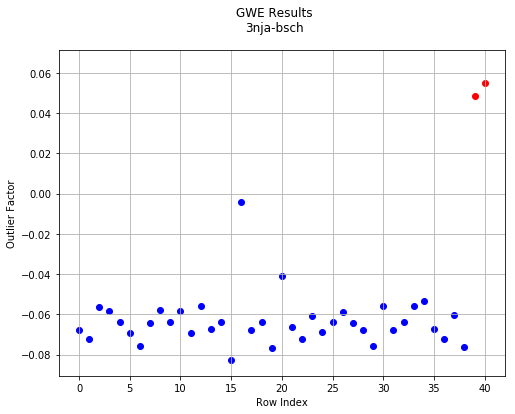

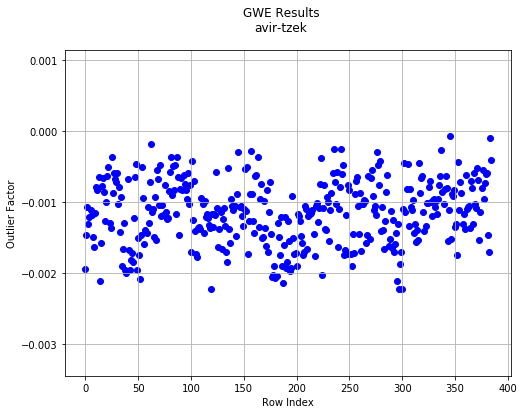

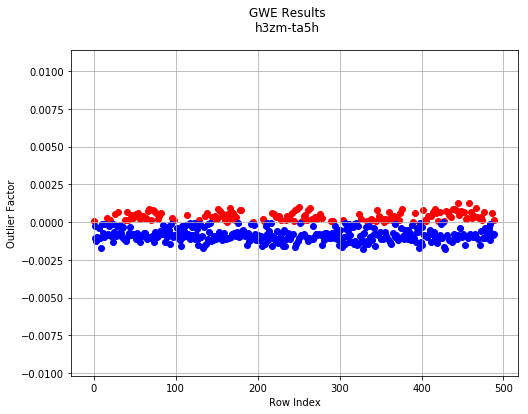

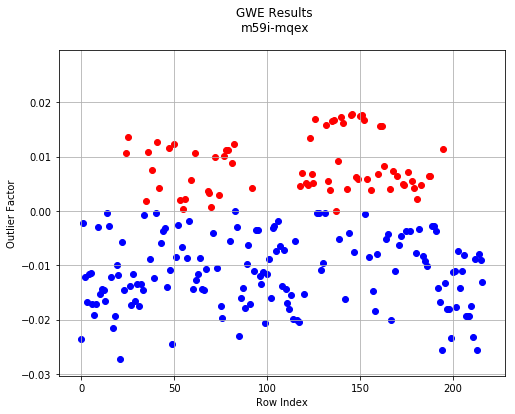

In [33]:
for data in [(b,'3nja-bsch'),(c,'avir-tzek'),(d,'h3zm-ta5h'),(e,'m59i-mqex')]:
    outliers, factors = GreedyWeightedEntropy(data[0])
    print(outliers)
    fig = plt.figure(figsize=(8,6))
    
    factors_pos = factors.copy()
    factors_neg = factors.copy()

    factors_pos[factors_pos <= 0] = np.nan
    factors_neg[factors_neg > 0] = np.nan
    
    
    plt.scatter(data[0].index, factors_pos, color='r')
    plt.scatter(data[0].index, factors_neg, color='b')
    plt.grid()
    plt.xlabel('Row Index')
    plt.ylabel('Outlier Factor')
    plt.suptitle('GWE Results\n{}'.format(data[1]))
    fig.savefig('images/{}.png'.format(data[1]), bbox_inches='tight')

In [32]:
e

,queens_condominium_property_total_units,comparable_rental_2_address/latitude,comparable_rental_2_address/human_address/address,comparable_rental_2_address/human_address/city,comparable_rental_2_address/human_address/state,comparable_rental_2_address/longitude,comparable_rental_1_neighborhood,queens_condominium_property_full_market_value,queens_condominium_property_building_classification,comparable_rental_2_gross_sqft,...,queens_condominium_property_address/longitude,comparable_rental_2_year_built,queens_condominium_property_est_gross_income,queens_condominium_property_gross_sqft,comparable_rental_1_est_gross_income,queens_condominium_property_market_value_per_sqft,_comparable_rental_1_boro_block_lot,comparable_rental_1_gross_sqft,comparable_rental_2_market_value_per_sqft,comparable_rental_1_year_built
0,47,40.7,35 02 35 STREET,Queens,New York,-73.8,LONG ISLAND CITY,9140004,R2-WALK-UP,43300.0,...,-73.8,1926.0,1885980,62866,745000,145.0,4-00342-0024,61000,69.0,1929
1,13,40.7,14 56 31 DRIVE,Queens,New York,-73.8,ASTORIA,1699509,R4-ELEVATOR,61700.0,...,-73.8,2001.0,378900,18375,852831,92.0,4-00531-0060,46333,92.0,2002
2,15,40.7,45 55 41 STREET,Queens,New York,-73.8,SUNNYSIDE,878994,R4-ELEVATOR,16840.0,...,-73.8,1931.0,221662,15610,162364,56.0,4-02289-0020,16400,54.0,1928
3,52,40.7,41 22 42 STREET,Queens,New York,-73.8,SUNNYSIDE,1990002,R4-ELEVATOR,61770.0,...,-73.8,1937.0,588350,54986,647986,36.2,4-00184-0023,64505,47.3,1937
4,93,40.7,43 09 40 STREET,Queens,New York,-73.8,SUNNYSIDE,3269994,R4-ELEVATOR,66714.0,...,-73.8,1932.0,870179,69337,775703,47.2,4-00184-0029,61770,52.0,1937
5,64,40.7,43 09 40 STREET,Queens,New York,-73.8,SUNNYSIDE,3030005,R4-ELEVATOR,66714.0,...,-73.8,1932.0,805924,59920,597626,51.0,4-00134-0001,45900,52.0,1932
6,30,40.7,68 12 AUSTIN STREET,Queens,New York,-73.8,FOREST HILLS,2830001,R4-ELEVATOR,16949.0,...,-73.8,1998.0,632864,27636,301631,102.0,4-02225-0030,18700,86.0,1986
7,47,40.7,47 46 40 STREET,Queens,New York,-73.8,SUNNYSIDE,2070003,R4-ELEVATOR,50400.0,...,-73.8,1939.0,550200,42000,573062,49.3,4-00193-0055,43600,41.7,1936
8,35,40.7,29 02 29 STREET,Queens,New York,-73.8,LONG ISLAND CITY,16660,R4-ELEVATOR,70000.0,...,-73.8,1929.0,0,785,745344,21.2,4-00343-0024,78660,55.0,1929
9,25,40.7,14 56 31 DRIVE,Queens,New York,-73.8,ASTORIA,3729984,R4-ELEVATOR,61700.0,...,-73.8,2001.0,835710,40529,852831,92.0,4-00531-0060,46333,92.0,2002
